In [18]:
#Importing Libraries.

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import csv


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [27]:
# Create dataframe

np.random.seed(10)
number_of_samples = 800
frame = pd.DataFrame({
    'Unnamed': np.arange(800),
    'Age': np.random.randint(low=20,high=60,size=800),
    'Win':    np.random.binomial(2,0.1,size=800), #np.random.binomial(size=800, n=1, p= 0.5),
    'Player_height(cm)': np.random.randint(low=150,high=230,size=800),
    'Player_weight(kg)' : np.random.randint(low=50,high=180,size=800),
    'Number_of_losses' : np.random.randint(low=0,high=50,size=800),
    'Number_of_wins' : np.random.randint(low=0,high=40,size=800)
},columns=['Unnamed','Age','Win','Player_height(cm)','Player_weight(kg)','Number_of_losses','Number_of_wins'])

print(frame)

     Unnamed  Age  Win  Player_height(cm)  Player_weight(kg)  \
0          0   29    0                180                102   
1          1   56    0                211                101   
2          2   35    0                200                 88   
3          3   20    2                194                122   
4          4   48    0                212                160   
..       ...  ...  ...                ...                ...   
795      795   39    0                194                 97   
796      796   22    0                223                 67   
797      797   39    1                213                128   
798      798   51    0                181                109   
799      799   25    0                223                146   

     Number_of_losses  Number_of_wins  
0                  13              24  
1                   0              18  
2                   0              23  
3                  11              36  
4                   7          

In [28]:
y = frame['Win']
x = frame[['Age','Player_height(cm)','Player_weight(kg)','Number_of_losses','Number_of_wins']]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20) 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 20)

In [30]:
#print some statistical insights.

x.describe()

,Age,Player_height(cm),Player_weight(kg),Number_of_losses,Number_of_wins
count,800.000000,800.000000,800.000000,800.000000,800.000000
mean,39.790000,189.978750,113.735000,24.903750,19.357500
std,11.623351,23.035442,37.593302,14.488422,11.584362
min,20.000000,150.000000,50.000000,0.000000,0.000000
25%,29.000000,171.000000,81.000000,12.000000,9.000000
50%,39.000000,191.000000,112.000000,25.000000,19.000000
75%,50.000000,209.000000,147.000000,38.000000,29.250000
max,59.000000,229.000000,179.000000,49.000000,39.000000


In [31]:
y.describe()

count    800.000000
mean       0.226250
std        0.455874
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: Win, dtype: float64

In [32]:
#Create KNN Classifier

knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets

knn.fit(x_train, y_train)

#Predict the response for test dataset

y_pred = knn.predict(x_test)

In [33]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7625


In [34]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.81
Accuracy for k= 2 is: 0.81
Accuracy for k= 3 is: 0.81
Accuracy for k= 4 is: 0.81
Accuracy for k= 5 is: 0.81
Accuracy for k= 6 is: 0.81
Accuracy for k= 7 is: 0.81
Accuracy for k= 8 is: 0.81
Accuracy for k= 9 is: 0.81
Accuracy for k= 10 is: 0.81
Accuracy for k= 11 is: 0.81
Accuracy for k= 12 is: 0.81
Accuracy for k= 13 is: 0.81
Accuracy for k= 14 is: 0.81
Accuracy for k= 15 is: 0.81
Accuracy for k= 16 is: 0.81
Accuracy for k= 17 is: 0.81
Accuracy for k= 18 is: 0.81
Accuracy for k= 19 is: 0.81
Accuracy for k= 20 is: 0.81
Accuracy for k= 21 is: 0.8
Accuracy for k= 22 is: 0.8
Accuracy for k= 23 is: 0.8
Accuracy for k= 24 is: 0.81
Accuracy for k= 25 is: 0.76
Accuracy for k= 26 is: 0.78
Accuracy for k= 27 is: 0.72
Accuracy for k= 28 is: 0.77
Accuracy for k= 29 is: 0.67


Text(0, 0.5, 'Testing Accuracy')

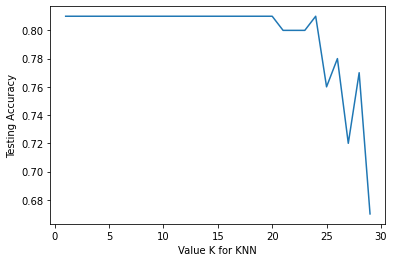

In [35]:
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

In [36]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

#
y_pred=logreg.predict(x_test)

/home/haghob/Documents/Hana/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[130,   0,   0],
       [ 28,   0,   0],
       [  2,   0,   0]])

Text(0.5, 257.44, 'Predicted label')

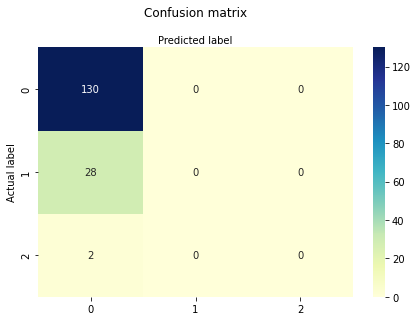

In [39]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')